# 전국일방통행도로표준데이터

- 데이터 전처리

    - 시도명, 지정사유, 지정연도, 도로폭, 도로차로수, 보차분리여부
    
- 결측치 처리 (column 개별 기준)
- 오류치 처리 (unit의 차이)
- 이상치 처리 (iqr 사용)
- 전처리 내용 정리

In [65]:
import pandas as pd
import numpy as np


url = 'https://www.data.go.kr/download/15028199/standard.do?dataType=csv'
raw_df = pd.read_csv(url, encoding= 'cp949')
column_selection = ['시도명', '지정사유', '지정연도', '도로폭', '도로차로수', '보차분리여부']
select_df = raw_df[column_selection] 

In [66]:
select_df.isnull().sum()

시도명          0
지정사유      1567
지정연도      1609
도로폭          0
도로차로수        1
보차분리여부       0
dtype: int64

In [67]:
select_df['도로차로수'].value_counts()

1.0     2042
2.0       90
4.0       12
3.0        9
5.0        4
60.0       1
Name: 도로차로수, dtype: int64

In [68]:


select_df.loc[select_df['지정사유'].isna(), '지정사유'] = '사유없음'
select_df.loc[select_df['지정연도'].isna(), '지정연도'] = 0.0
select_df.loc[select_df['도로차로수'].isna(), '도로차로수'] = 1.0
select_df.replace({'시도명': '10'}, '서울특별시', inplace = True)
select_df.replace({'보차분리여부': ' '}, 'N', inplace = True)

select_df.replace({'보차분리여부': 'Y'}, 1, inplace = True)
select_df.replace({'보차분리여부': 'N'}, 0, inplace = True)
select_df['지정사유'] = select_df['지정사유'].astype('category')
select_df['시도명'] = select_df['시도명'].astype('category')
select_df['보차분리여부'] = select_df['보차분리여부'].astype('category')


/var/folders/br/8bbtv7t175s4k3b2shs9n46m0000gn/T/ipykernel_42246/4124278773.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_df.replace({'시도명': '10'}, '서울특별시', inplace = True)
/var/folders/br/8bbtv7t175s4k3b2shs9n46m0000gn/T/ipykernel_42246/4124278773.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_df.replace({'보차분리여부': ' '}, 'N', inplace = True)
/var/folders/br/8bbtv7t175s4k3b2shs9n46m0000gn/T/ipykernel_42246/4124278773.py:7: SettingWithCopyWarning: 
A value is trying to be set on a co

In [69]:
select_df['지정사유'].isna().value_counts()

False    2159
Name: 지정사유, dtype: int64

In [70]:
select_df['지정연도'].isna().value_counts()

False    2159
Name: 지정연도, dtype: int64

In [71]:
select_df['도로차로수'].isna().value_counts()
select_df['시도명'].value_counts()

서울특별시      765
경기도        384
경상북도       329
경상남도       152
전라남도       115
충청남도       113
강원도         58
광주광역시       58
제주특별자치도     55
인천광역시       51
충청북도        42
전라북도        37
Name: 시도명, dtype: int64

In [75]:
Q1 = select_df['도로차로수'].quantile(0.25)
Q3 = select_df['도로차로수'].quantile(0.75)
IQR = Q3 - Q1

# 이상치 감지
select_df.loc[(select_df['도로차로수'] < (Q1 - 1.5 * IQR)) | (select_df['도로차로수'] > (Q3 + 1.5 * IQR)), '도로차로수'] = np.nan

select_df['도로차로수'].isna().value_counts()


# 이상치 정제
select_df.dropna(subset=['도로차로수'], inplace=True)
select_df['도로차로수'].isna().value_counts()
# df_cleaned = select_df[(select_df['도로차로수'] >= (Q1 - 1.5 * IQR)) & (select_df['도로차로수'] <= (Q3 + 1.5 * IQR))]
# print("정제된 데이터: ", df_cleaned)

/var/folders/br/8bbtv7t175s4k3b2shs9n46m0000gn/T/ipykernel_42246/733556926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_df.dropna(subset=['도로차로수'], inplace=True)


False    2043
Name: 도로차로수, dtype: int64

In [76]:
Q1 = select_df['도로폭'].quantile(0.25)
Q3 = select_df['도로폭'].quantile(0.75)
IQR = Q3 - Q1

# 이상치 감지
select_df.loc[(select_df['도로폭'] < (Q1 - 1.5 * IQR)) | (select_df['도로폭'] > (Q3 + 1.5 * IQR)), '도로폭'] = np.nan

# 이상치 정제
select_df.dropna(subset=['도로폭'], inplace=True)


/var/folders/br/8bbtv7t175s4k3b2shs9n46m0000gn/T/ipykernel_42246/631545502.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_df.dropna(subset=['도로폭'], inplace=True)


# 전처리 내용 정리

- 데이터 전처리: 
    - 지정사유 : category
    - 시도명 : category
    - 보차분리여부 : category
    - 지정연도 : float
    - 도로폭 : float
    - 도로차수 : float

- 결측치 :
    - 지정사유 , 지정연도 같은경우에는 결측치자체가 너무 많았고 우리가 임의대로 바꿀 수 없었기에 나중에 처리를 하기위해 각각 사유없음과 0.0으로 대체하였습니다 . 
    - 도로차수의 결측치는 일단 무조건 도로차수가 하나는 있어야 일방통행 등재가 됬을 것이기 때문에 1.0으로 처리했습니다
    

- 오류치:
    - 시도명 :  시도명의 경우 시도 명으로 표기해야하는데 10개가 10으로 표시되어있어 가장많은 시인 서울특별시로 설정했습니다.
    - 보차분리여부: Y 와 N으로 표기되야하지만 ' ' 문자열 빈값으로 표기된 것을 N으로 표기했습니다.
    
    
- 이상치:
    - 각각 1.5를기준으로 최대와 최저를 짤라서 구함
    - 도로차수 : 도로차수의 이상치가 보이는 것같아 확인하고 정제하였습니다 Iqr을 사용하였습니다.
    - 도로폭: 도로폭의 이상치를 확인하고 정제하는 작업을 하였습니다.

In [48]:
select_df

,시도명,지정사유,지정연도,도로폭,도로차로수,보차분리여부
0,경기도,사유없음,0.0,5.0,1.0,1
1,경기도,사유없음,0.0,5.0,1.0,1
2,경기도,사유없음,0.0,9.0,1.0,1
3,경기도,사유없음,0.0,4.0,1.0,1
4,경기도,사유없음,0.0,4.0,1.0,1
...,...,...,...,...,...,...
2154,경기도,통행원활,0.0,6.0,1.0,0
2155,경기도,통행원활,0.0,6.0,1.0,0
2156,경기도,통행원활,0.0,6.0,1.0,0
2157,경기도,통행원활,0.0,6.0,1.0,0


/opt/homebrew/opt/ipython/libexec/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/opt/ipython/libexec/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/opt/ipython/libexec/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54253 (\N{HANGUL SYLLABLE POG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/opt/ipython/libexec/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/opt/ipython/libexec/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}

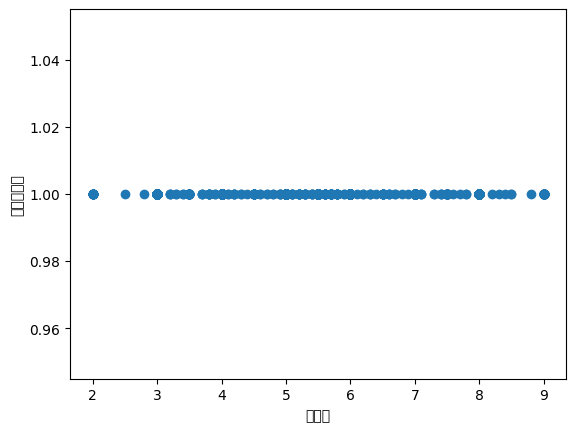

In [77]:
import matplotlib.pyplot as plt

plt.scatter(select_df['도로폭'], select_df['도로차로수'])
plt.xlabel("도로폭")
plt.ylabel("도로차로수")
plt.show()